In [1]:
import torch
import tensorflow as tf
import torchvision.models as models

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
torch_model = models.densenet121(pretrained=False, num_classes=1000)

In [4]:
torch_model.load_state_dict(torch.load('/Users/mzvyagin/Documents/cross_framework_hpo/cross_framework_hpo/cifar100/densenet_lambda/model_weights/dual_train_32d9da9e.pt_model.pt'))

<All keys matched successfully>

In [ ]:
torch_model.eval()

In [30]:
torch_final_conv = torch_model.state_dict()['features.denseblock4.denselayer16.conv2.weight'].numpy()

In [8]:
torch_params = []
for x in model.parameters():
    torch_params.extend(x.detach().numpy().flatten())

In [9]:
len(torch_params)

7978856

In [76]:
tf.keras.backend.set_image_data_format('channels_first')

In [77]:
tf_model =tf.keras.applications.densenet.DenseNet121(weights=None, input_shape=(3, 32, 32), classes=100)
tf_model.load_weights('/Users/mzvyagin/Documents/cross_framework_hpo/cross_framework_hpo/cifar100/densenet_lambda/model_weights/dual_train_32d9da9etf_model')

In [78]:
tf_model.trainable_variables[15].name

'conv2_block3_0_bn/gamma:0'

In [79]:
tf_params = []
for x in tf_model.trainable_variables:
    tf_params.extend(x.numpy().flatten())

In [80]:
for x in tf_model.trainable_variables:
    if 'conv5_block16_2_conv' in x.name:
        tf_final_conv = x.numpy()

In [81]:
tf_final_conv.shape

(3, 3, 128, 32)

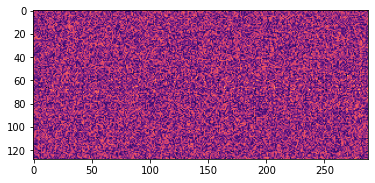

In [83]:
plt.imshow(tf_final_conv.reshape(128, -1), cmap='magma')
plt.savefig('tf_final_conv.png', dpi=300)

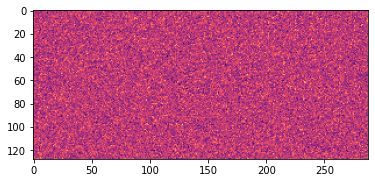

In [84]:
f = plt.imshow(torch_final_conv.reshape(128, -1), cmap='magma')
plt.savefig('torch_final_conv.png', dpi=300)

In [52]:
f

In [49]:
fig = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [50]:
plt.savefig('torch_final_conv.png')

<Figure size 432x288 with 0 Axes>

In [39]:
plt.savefig('torch_final_conv.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Count'>

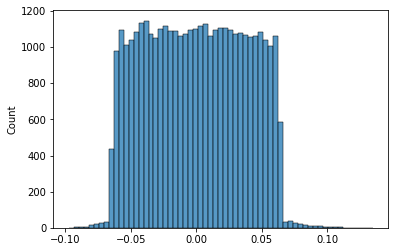

In [31]:
sns.histplot(tf_final_conv.flatten())

<AxesSubplot:ylabel='Count'>

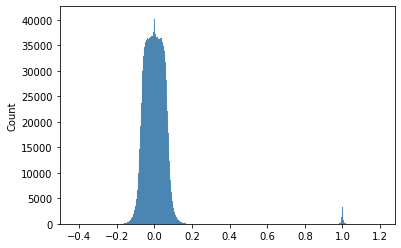

In [13]:
sns.histplot(tf_params)

<AxesSubplot:ylabel='Count'>

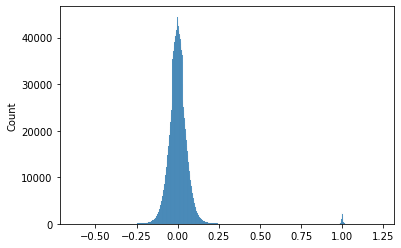

In [14]:
sns.histplot(torch_params)